This file is to visualize the statistical properties of the dataset to gain an insight in why the model may be struggling to learn certain patterns

In [44]:
import pandas as pd
import numpy as np

data_file_path = 'test_data/Their_DATA.csv'
df = pd.read_csv(data_file_path)

column_keys = np.array([(i, col) for i, col in enumerate(df.columns)])
print("Column keys:\n", column_keys)

elements_to_keep = ['U238', 'U235', 'Pu240', 'Pu241']
statefeatures_to_keep = ['time_days', 'k_eff', 'power_W_g', 'int_p_W', 'fuel_temp_K', 'mod_temp_K', 'clad_temp_K', 
                         'mod_density_g_cm3', 'boron_ppm']

# Remove the unnecessary columns from the dataframe
df = df[elements_to_keep + statefeatures_to_keep]
data_array = df.to_numpy()
print("\nData array shape:", data_array.shape)


Column keys:
 [['0' 'run_label']
 ['1' 'time_days']
 ['2' 'k_eff']
 ['3' 'k_eff_std']
 ['4' 'power_W_g']
 ['5' 'int_p_W']
 ['6' 'fuel_temp_K']
 ['7' 'mod_temp_K']
 ['8' 'clad_temp_K']
 ['9' 'mod_density_g_cm3']
 ['10' 'boron_ppm']
 ['11' 'U234']
 ['12' 'U235']
 ['13' 'U236']
 ['14' 'U238']
 ['15' 'Np237']
 ['16' 'Pu238']
 ['17' 'Pu239']
 ['18' 'Pu240']
 ['19' 'Pu241']
 ['20' 'Pu242']
 ['21' 'Am241']
 ['22' 'Am242']
 ['23' 'Am243']
 ['24' 'Cm242']
 ['25' 'Cm243']
 ['26' 'H1']
 ['27' 'B10']
 ['28' 'B11']
 ['29' 'N14']
 ['30' 'O16']
 ['31' 'Kr83']
 ['32' 'Nb93']
 ['33' 'Zr94']
 ['34' 'Mo95']
 ['35' 'Tc99']
 ['36' 'Rh103']
 ['37' 'Rh105']
 ['38' 'Ru106']
 ['39' 'Ag109']
 ['40' 'Sn126']
 ['41' 'I135']
 ['42' 'Xe131']
 ['43' 'Xe135']
 ['44' 'Cs133']
 ['45' 'Cs134']
 ['46' 'Cs135']
 ['47' 'Cs137']
 ['48' 'Pr143']
 ['49' 'Ce144']
 ['50' 'Nd143']
 ['51' 'Nd145']
 ['52' 'Nd146']
 ['53' 'Nd147']
 ['54' 'Pm147']
 ['55' 'Pm148']
 ['56' 'Pm149']
 ['57' 'Nd148']
 ['58' 'Sm147']
 ['59' 'Sm149']
 ['60'

In [45]:
print(df.iloc[:102]['U238'])
# To see that runs are 101 steps long

0      0.022253
1      0.022248
2      0.022248
3      0.022244
4      0.022244
         ...   
97     0.021975
98     0.021972
99     0.021968
100    0.021964
101    0.022253
Name: U238, Length: 102, dtype: float64


In [46]:
target_names = ['U238', 'U235', 'Pu240', 'Pu241']  # All others are considered as inputs
input_cols = df.columns

# Get indices for input and target columns
target_indices = [df.columns.get_loc(col) for col in target_names]
input_indices = [df.columns.get_loc(col) for col in input_cols]

# Find run boundaries (every 101 rows)
n_sequences = len(df) // 101
run_start_indices = []
run_end_indices = []

for i in range(n_sequences):
  run_start_indices.append(i * 101)
  run_end_indices.append(i * 101 + 100)

# Create mask: exclude first index (for targets) and last index (for inputs) of each run
target_valid_mask = np.ones(len(df), dtype=bool)
input_valid_mask = np.ones(len(df), dtype=bool)

target_valid_mask[run_start_indices] = False  # Exclude first of each run from targets
input_valid_mask[run_end_indices] = False     # Exclude last of each run from inputs

target_valid_indices = np.where(target_valid_mask)[0]
input_valid_indices = np.where(input_valid_mask)[0]

# Create inputs and targets
inputs = df.iloc[input_valid_indices][input_cols].values
targets = df.iloc[target_valid_indices][target_names].values

print(f"Detected {n_sequences} runs of 101 timesteps each")
print(f"Input shape: {inputs} | Target shape: {targets}")
print(f"Targets: {target_names}")

Detected 1200 runs of 101 timesteps each
Input shape: [[2.22529990e-02 7.21750020e-04 0.00000000e+00 ...            nan
  7.76675725e-01 9.51139048e+02]
 [2.22480290e-02 7.12664640e-04 2.18289710e-08 ...            nan
  8.34162425e-01 7.14930212e+02]
 [2.22480290e-02 7.12664560e-04 2.18447430e-08 ...            nan
  8.46534105e-01 5.72906990e+02]
 ...
 [2.19459410e-02 3.14227170e-04 3.17357000e-05 ...            nan
  7.84944955e-01 9.33850863e+02]
 [2.19396340e-02 3.09329890e-04 3.22835790e-05 ...            nan
  7.74516770e-01 1.02331876e+02]
 [2.19380210e-02 3.08000900e-04 3.24455950e-05 ...            nan
  8.02171886e-01 5.58782038e+02]] | Target shape: [[2.2248029e-02 7.1266464e-04 2.1828971e-08 3.3906551e-10]
 [2.2248029e-02 7.1266456e-04 2.1844743e-08 3.3862876e-10]
 [2.2243663e-02 7.0408077e-04 9.9293431e-08 2.9384942e-09]
 ...
 [2.1939634e-02 3.0932989e-04 3.2283579e-05 1.5786353e-05]
 [2.1938021e-02 3.0800090e-04 3.2445595e-05 1.5872051e-05]
 [2.1933978e-02 3.0486984e-04 

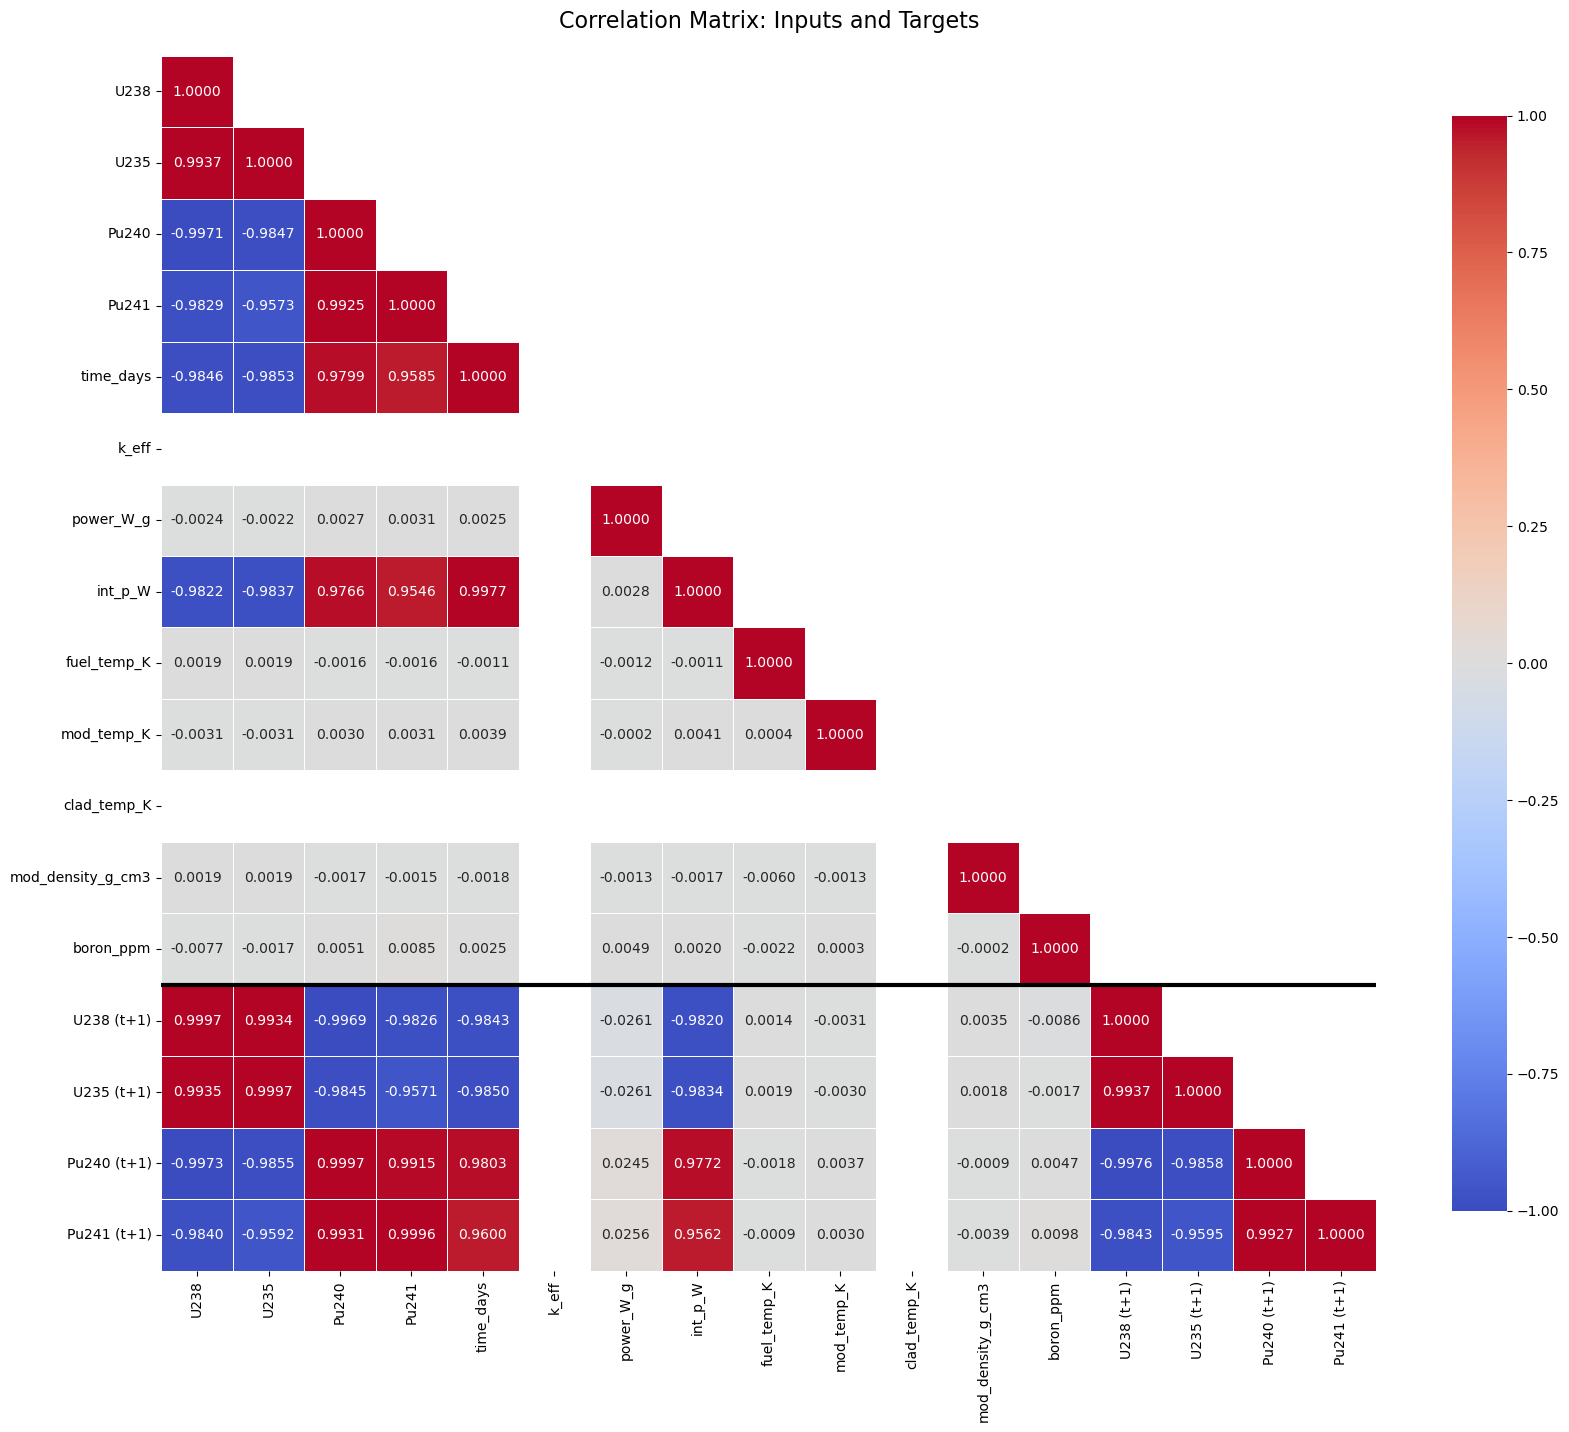

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Combine inputs and targets into one dataframe for correlation
combined_data = np.concatenate([inputs, targets], axis=1)
# Add (t+1) suffix to target names
target_names_t1 = [f"{name} (t+1)" for name in target_names]
combined_columns = list(input_cols) + target_names_t1

combined_df = pd.DataFrame(combined_data, columns=combined_columns)

# Calculate correlation matrix
corr_matrix = combined_df.corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# Create the plot
fig, ax = plt.subplots(figsize=(17, 15))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            fmt='.4f', vmin=-1, vmax=1, ax=ax)

# Add separator line between inputs and targets
n_inputs = len(input_cols)
ax.axhline(y=n_inputs, color='black', linewidth=3)

plt.title('Correlation Matrix: Inputs and Targets', fontsize=16, pad=20)
plt.tight_layout()
plt.show()